In [61]:
import sklearn
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
print(f'''train : {train.shape}
test : {test.shape}''')

train : (891, 12)
test : (418, 11)


In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
data = pd.concat([train,test])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
data.reset_index(inplace=True, drop=True)

In [69]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

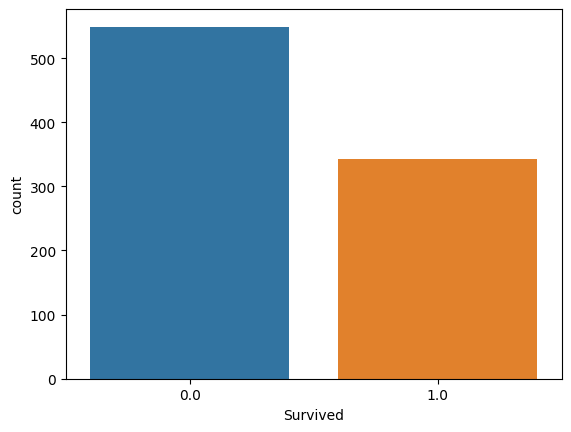

In [70]:
sns.countplot(x =  data['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

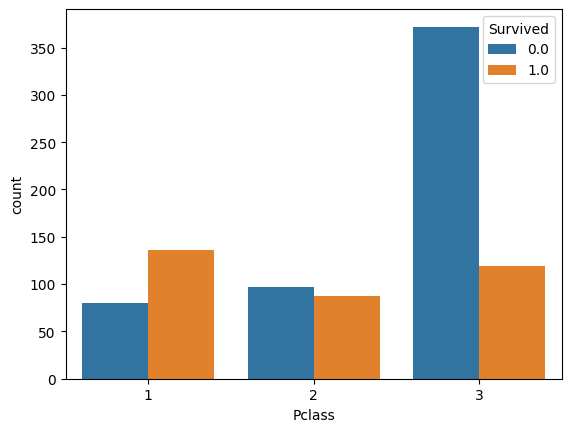

In [71]:
sns.countplot(x = data['Pclass'], hue=data['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

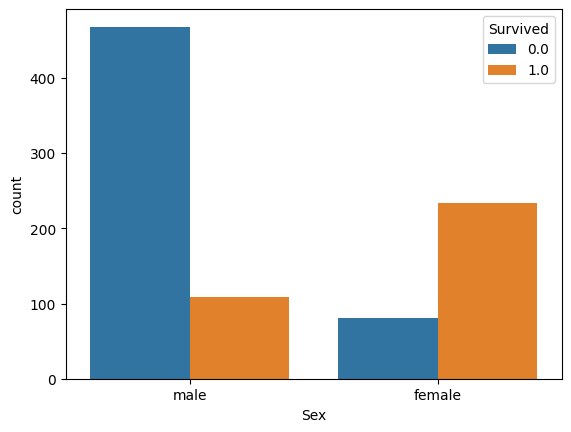

In [72]:
sns.countplot(x = data['Sex'], hue=data['Survived'])

<Axes: xlabel='Embarked', ylabel='count'>

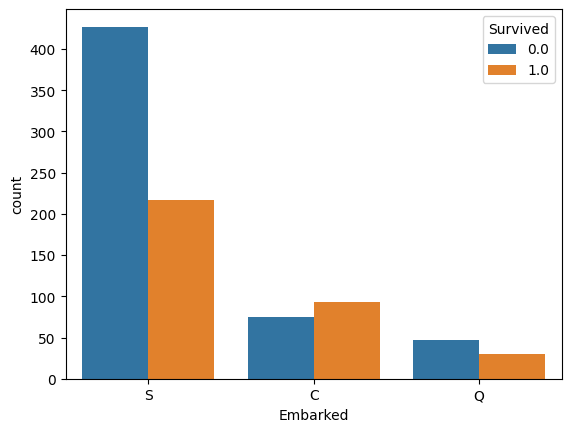

In [73]:
sns.countplot(x = data['Embarked'], hue=data['Survived'])

In [74]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [75]:
data['Title1'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title1, dtype: object

In [76]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [77]:
data['Title1'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title1, dtype: object

In [78]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [79]:
data['Title1'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [80]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title1       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [82]:
data.drop('Ticket',axis=1,inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Title1       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [84]:
data['Embarked'] = data['Embarked'].fillna('S')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Title1       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [86]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Title1       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [88]:
data['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [89]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [90]:
data['Cabin'] = data['Cabin'].fillna('X')

In [91]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0])

In [92]:
data["Cabin"].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [93]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Title1       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [95]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Title1'],
      dtype='object')

<ipython-input-96-af8e6a4b0e90>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

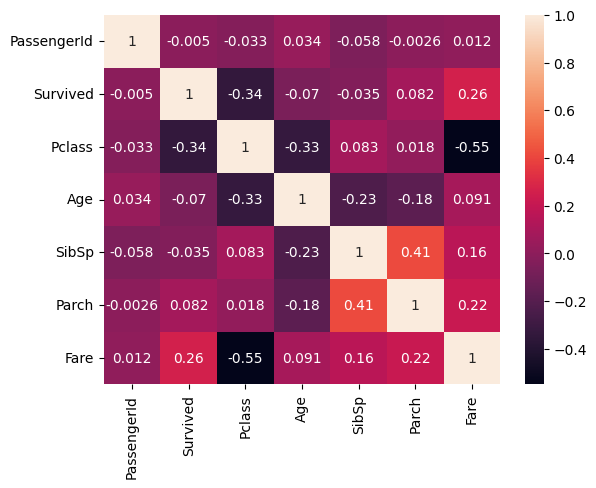

In [96]:
import seaborn as sns
dataset = data.iloc[:892]
ataset = dataset[['Survived', 'Pclass', 'Age', 'Fare']]

sns.heatmap(dataset.corr(), annot=True)

In [97]:
le = preprocessing.LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Pclass'] = le.fit_transform(data['Pclass'])
data['Title1'] = le.fit_transform(data['Title1'])
data['Cabin'] = le.fit_transform(data['Cabin'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title1
0,1,0.0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,8,2,2
1,2,1.0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,0,3
2,3,1.0,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,8,2,1
3,4,1.0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,3
4,5,0.0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,8,2,2


In [98]:
data.drop('SibSp',axis=1, inplace=True)
data.drop('Parch',axis=1, inplace=True)

<ipython-input-99-a36a139dcc8a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

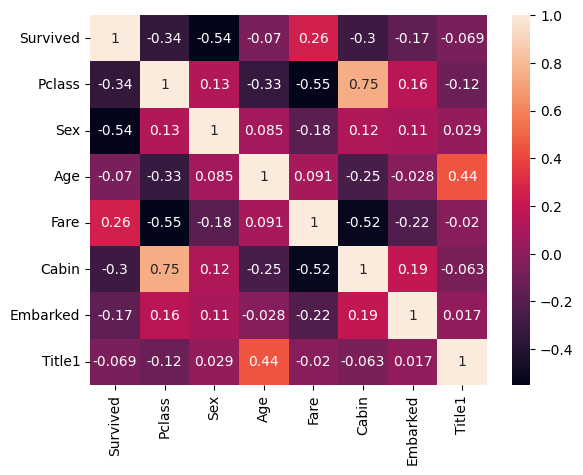

In [99]:
dataset = data.iloc[:892]
dataset = dataset[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Title1']]

sns.heatmap(dataset.corr(), annot=True)

In [100]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [101]:
dataTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Title1'],
      dtype='object')

In [102]:
dataTest.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Cabin', 'Embarked', 'Title1'],
      dtype='object')

In [103]:
dataTrain = dataTrain.drop('PassengerId', axis=1)
dataTrain = dataTrain.drop('Name', axis=1)
dataTrain.info()
dataTest = dataTest.drop(['PassengerId', 'Name'], axis=1)
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    int64  
 6   Embarked  891 non-null    int64  
 7   Title1    891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  0 non-null      float64
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     418 non-null    int64  
 6   Embarked  418 non-null    int64

In [104]:
dataTrain.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title1
0,0.0,2,1,22.0,7.2500,8,2,2
1,1.0,0,0,38.0,71.2833,2,0,3
2,1.0,2,0,26.0,7.9250,8,2,1
3,1.0,0,0,35.0,53.1000,2,2,3
4,0.0,2,1,35.0,8.0500,8,2,2


In [105]:
dataTest.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title1
891,NaN,2,1,34.5,7.8292,8,1,2
892,NaN,2,0,47.0,7.0000,8,2,3
893,NaN,1,1,62.0,9.6875,8,1,2
894,NaN,2,1,27.0,8.6625,8,2,2
895,NaN,2,0,22.0,12.2875,8,2,3


In [106]:
X, y = dataTrain.iloc[:,1:], dataTrain.iloc[:,0]

In [107]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]


gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2) # kfold

scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.817 +/- 0.021


In [108]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#找最佳超參數
svgs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=-1)

svgs.fit(X, y)
print(svgs.best_score_)
print(svgs.best_params_)

0.821585518102372
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [109]:
svgsb = svgs.best_estimator_
svgsb.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=0.1, random_state=1))])

In [110]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

gs = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X, y,
                         scoring='accuracy', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))


CV accuracy: 0.831 +/- 0.019


In [111]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#找最佳超參數
rfgs = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

rfgs.fit(X, y)
print(rfgs.best_score_)
print(rfgs.best_params_)


0.8103441326145009
{'max_depth': 7}


In [112]:
rfgsb = rfgs.best_estimator_
rfgsb.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=0)

In [ ]:
# XGB
from xgboost.sklearn import XGBClassifier

xgbgs = GridSearchCV(estimator=XGBClassifier(n_estimators=500, tree_method='hist', device='cuda'),
                  param_grid=[{'reg_lambda': [0.6, 1.2, 1.8, 2.4]}],
                  scoring='accuracy',
                  cv=4)

scores = cross_val_score(xgbgs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [114]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#找最佳超參數
xgbgs = GridSearchCV(estimator=XGBClassifier(n_estimators=500, tree_method='hist', device='cuda'),
                  param_grid=[{'reg_lambda': [0.6, 1.2, 1.8, 2.4]}],
                  scoring='accuracy',
                  cv=4)

xgbgs.fit(X, y)
print(xgbgs.best_score_)
print(xgbgs.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:43:41] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:43:41] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:43:42] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:43:42] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:43:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


0.803584414010423
{'reg_lambda': 1.2}


In [115]:
xgbgsb = xgbgs.best_estimator_
xgbgsb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_range = [5, 8, 11, 14, 17, 20]
param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]

knngs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=4)


scores = cross_val_score(knngs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.815 +/- 0.017


In [117]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#找最佳超參數
knngs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=4)

knngs.fit(X, y)
print(knngs.best_score_)
print(knngs.best_params_)

0.828308689855775
{'kneighborsclassifier__n_neighbors': 8}


In [118]:
knngsb = knngs.best_estimator_
knngsb.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=8))])

In [125]:
# submit

X_test_final = dataTest.iloc[:,1:]

# result = svgsb.predict(X_test_final)
# result = rfgsb.predict(X_test_final)
# result = xgbgsb.predict(X_test_final)
result = knngsb.predict(X_test_final)

submit['Survived'] = result
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('/content/drive/MyDrive/submit_KNN.csv', index= False)

In [126]:
# ensemble

X_test_final = dataTest.iloc[:,1:]

from sklearn.calibration import CalibratedClassifierCV

#SVC
calibration_svg = CalibratedClassifierCV(svgs.best_estimator_,cv=5)
calibration_svg.fit(X, y)
yprob_s = calibration_svg.predict_proba(X_test_final)

# Random Forest
calibration_rfg = CalibratedClassifierCV(rfgs.best_estimator_,cv=5)
calibration_rfg.fit(X, y)
yprob_r = calibration_rfg.predict_proba(X_test_final)

# XGB
calibration_xgbg = CalibratedClassifierCV(xgbgs.best_estimator_,cv=5)
calibration_xgbg.fit(X, y)
yprob_x = calibration_xgbg.predict_proba(X_test_final)

# KNN
calibration_knng = CalibratedClassifierCV(knngs.best_estimator_,cv=5)
calibration_knng.fit(X, y)
yprob_k = calibration_knng.predict_proba(X_test_final)

#yprob_mean = (yprob_r + yprob_s + yprob_x + yprob_k)/4.0
yprob_mean = (yprob_k + yprob_r) / 2.0
result = yprob_mean.argmax(axis=1)

submit['Survived'] = result
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('/content/drive/MyDrive/submit_KR.csv', index= False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:53:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:53:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:53:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:53:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:53:36] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
